In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten labels for sklearn compatibility
y_train, y_test = y_train.flatten(), y_test.flatten()

# Print dataset shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3), Test data shape: (10000, 32, 32, 3)


In [ ]:
# Reshape images into 1D feature vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"Flattened feature shape: {X_train_flat.shape}")




Flattened feature shape: (50000, 3072)


In [ ]:
print("Training Random Forest (Raw Pixel Features)...")
rf_pixel = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_pixel.fit(X_train_flat, y_train)

Training Random Forest (Raw Pixel Features)...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

Accuracy (Raw Pixels): 0.4817

Classification Report (Raw Pixels):
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
           1       0.54      0.56      0.55      1000
           2       0.41      0.33      0.37      1000
           3       0.37      0.29      0.33      1000
           4       0.41      0.40      0.40      1000
           5       0.44      0.41      0.42      1000
           6       0.47      0.60      0.53      1000
           7       0.52      0.48      0.50      1000
           8       0.58      0.62      0.60      1000
           9       0.49      0.58      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



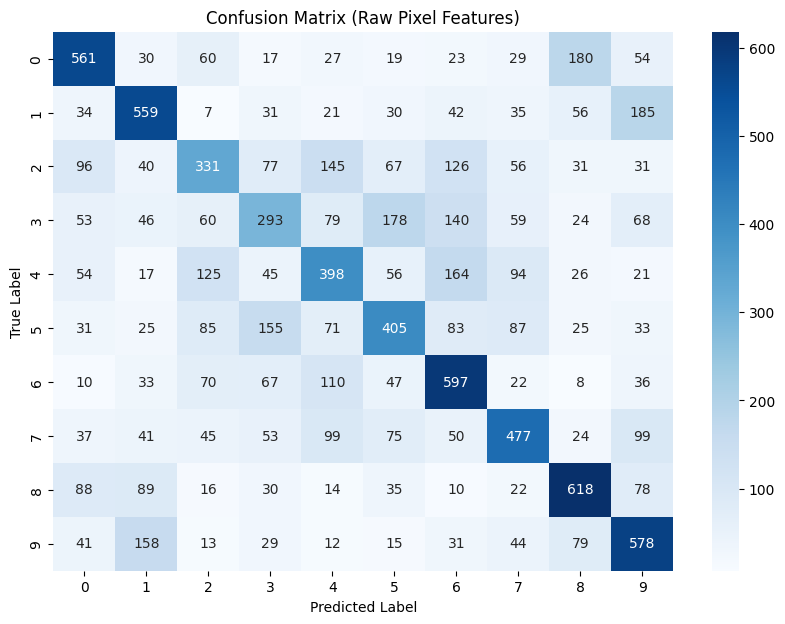

In [ ]:
# Make predictions
y_pred_pixel = rf_pixel.predict(X_test_flat)

# Compute accuracy
accuracy_pixel = accuracy_score(y_test, y_pred_pixel)
print(f"Accuracy (Raw Pixels): {accuracy_pixel:.4f}")

# Classification report
print("\nClassification Report (Raw Pixels):")
print(classification_report(y_test, y_pred_pixel))

# Plot confusion matrix
cm_pixel = confusion_matrix(y_test, y_pred_pixel)
plt.figure(figsize=(10,7))
sns.heatmap(cm_pixel, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Raw Pixel Features)")
plt.show()


Training Random Forest with 10 trees...
Accuracy: 0.3611

Training Random Forest with 50 trees...
Accuracy: 0.4464

Training Random Forest with 100 trees...
Accuracy: 0.4654

Training Random Forest with 200 trees...
Accuracy: 0.4769

Training Random Forest with 300 trees...
Accuracy: 0.4817

Training Random Forest with 400 trees...
Accuracy: 0.4840

Training Random Forest with 500 trees...
Accuracy: 0.4868



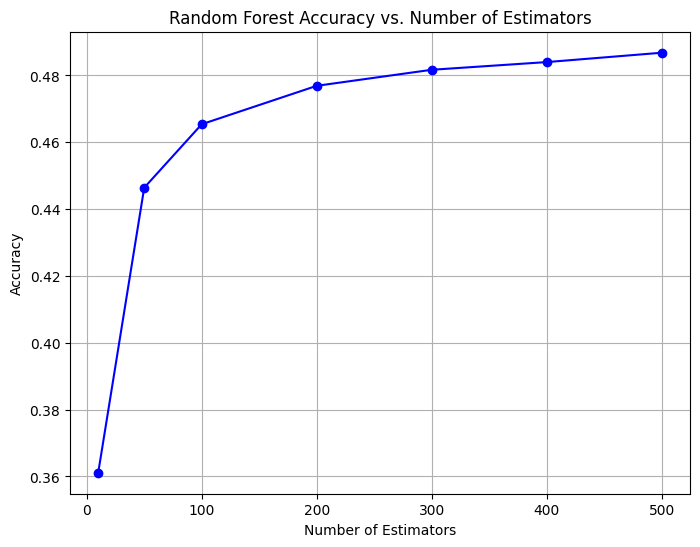

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# Reshape images into 1D feature vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Range of n_estimators to test
accuracies = []

# Train and evaluate RF for different n_estimators
for n in n_estimators_list:
    print(f"Training Random Forest with {n} trees...")
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train_flat, y_train)
    y_pred = rf.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy: {acc:.4f}\n")

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.grid(True)
plt.show()


In [ ]:
def extract_hog_features(images):
    hog_features = []
    for img in images:
        gray = rgb2gray(img)  # Convert to grayscale
        feature = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_features.append(feature)
    return np.array(hog_features)

# Extract HOG features for the whole dataset
print("Extracting HOG features (this may take some time)...")
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

print(f"HOG feature shape: {X_train_hog.shape}")


Extracting HOG features (this may take some time)...
HOG feature shape: (50000, 324)


In [ ]:
print("Training Random Forest (HOG Features)...")
rf_hog = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_hog.fit(X_train_hog, y_train)


Training Random Forest (HOG Features)...


RandomForestClassifier(n_jobs=-1, random_state=42)

Accuracy (HOG Features): 0.5061

Classification Report (HOG Features):
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1000
           1       0.57      0.66      0.61      1000
           2       0.47      0.37      0.41      1000
           3       0.36      0.27      0.30      1000
           4       0.42      0.43      0.42      1000
           5       0.39      0.44      0.42      1000
           6       0.50      0.63      0.55      1000
           7       0.60      0.51      0.55      1000
           8       0.57      0.57      0.57      1000
           9       0.58      0.59      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.50      0.51      0.50     10000
weighted avg       0.50      0.51      0.50     10000



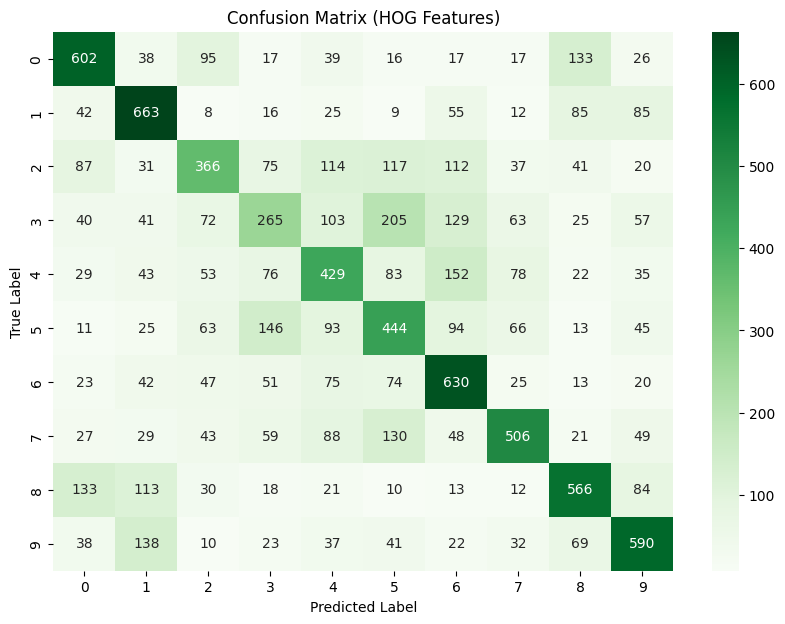

In [ ]:
# Make predictions
y_pred_hog = rf_hog.predict(X_test_hog)

# Compute accuracy
accuracy_hog = accuracy_score(y_test, y_pred_hog)
print(f"Accuracy (HOG Features): {accuracy_hog:.4f}")

# Classification report
print("\nClassification Report (HOG Features):")
print(classification_report(y_test, y_pred_hog))

# Plot confusion matrix
cm_hog = confusion_matrix(y_test, y_pred_hog)
plt.figure(figsize=(10,7))
sns.heatmap(cm_hog, annot=True, fmt="d", cmap="Greens", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (HOG Features)")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize and preprocess images for EfficientNet
x_train = preprocess_input(x_train.astype('float32'))
x_test = preprocess_input(x_test.astype('float32'))

# Load pre-trained EfficientNetB0 and remove the classification layer
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Feature extraction model
feature_extractor = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))

# Extract deep features
x_train_features = feature_extractor.predict(x_train, batch_size=64, verbose=1)
x_test_features = feature_extractor.predict(x_test, batch_size=64, verbose=1)

# Reduce feature dimensionality using PCA
pca = PCA(n_components=200)  # Keeping the best 200 features
x_train_pca = pca.fit_transform(x_train_features)
x_test_pca = pca.transform(x_test_features)

# Train Random Forest on extracted features
rf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42, n_jobs=-1)
rf.fit(x_train_pca, y_train.ravel())

# Predict and evaluate
y_pred = rf.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)



16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step


 Final Accuracy : 0.5150

Classification Report:
               precision    recall  f1-score   support

           0     0.5895    0.5400    0.5637      1000
           1     0.5534    0.5490    0.5512      1000
           2     0.4489    0.4000    0.4231      1000
           3     0.3786    0.3510    0.3643      1000
           4     0.4820    0.4690    0.4754      1000
           5     0.4408    0.4540    0.4473      1000
           6     0.5649    0.6920    0.6220      1000
           7     0.5551    0.5440    0.5495      1000
           8     0.5776    0.5620    0.5697      1000
           9     0.5389    0.5890    0.5628      1000

    accuracy                         0.5150     10000
   macro avg     0.5130    0.5150    0.5129     10000
weighted avg     0.5130    0.5150    0.5129     10000



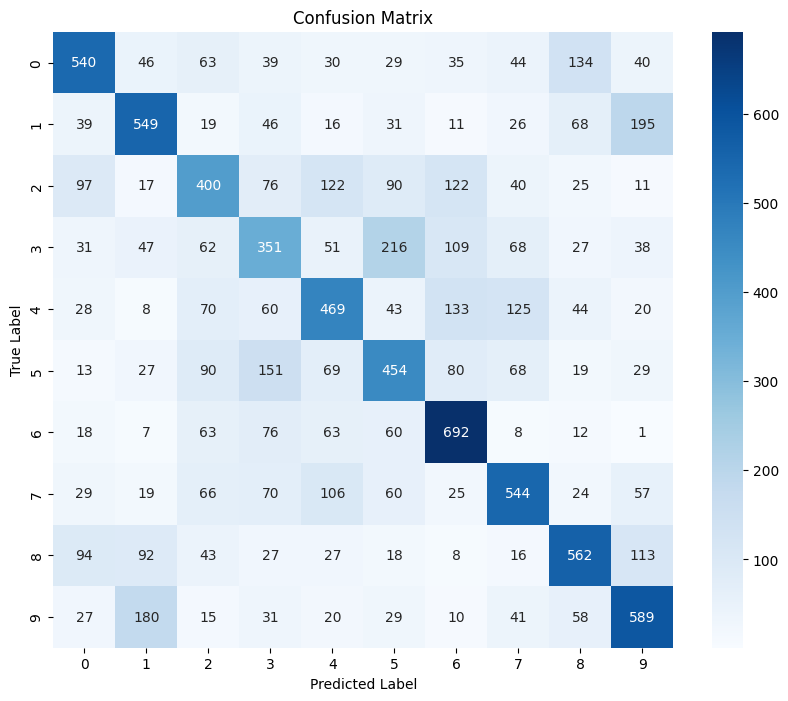

In [ ]:
print(f" Final Accuracy : {accuracy:.4f}")
print("\nClassification Report:\n", report)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()